In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import numpy as np

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
input_csv = 'csv/output.csv'
df = pd.read_csv(input_csv)
print(df.head())

   id                                               text  class
0   1  director operation , bpo executive summary res...      8
1   2  buyer summary 1 year end end experience worldw...      8
2   3  sr. workforce manager summary results-oriented...      8
3   4  risk specialist professional summary sale oper...      8
4   5  general manager board member executive profile...      8


In [3]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['class'], test_size=0.33, random_state=None)
print(f"Conjunto de treino: {len(X_train)} exemplos")
print(f"Conjunto de teste: {len(X_test)} exemplos")


Conjunto de treino: 1663 exemplos
Conjunto de teste: 820 exemplos


In [4]:
def train_naive_bayes(X_train, y_train, X_test):
    pipeline = Pipeline([
        ('vect', CountVectorizer()),
        ('clf', MultinomialNB())
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [5]:
def train_random_forest(X_train, y_train, X_test):
    pipeline = Pipeline([
        ('vect', CountVectorizer()),
        ('clf', RandomForestClassifier())
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [6]:
def train_bernoulli(X_train, y_train, X_test):
    pipeline = Pipeline([
        ('vect', CountVectorizer()),
        ('clf', BernoulliNB())
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [7]:
def train_logistic_regression(X_train, y_train, X_test):
    pipeline = Pipeline([
        ('vect', CountVectorizer()),
        ('clf', LogisticRegression(max_iter=1000))
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [8]:
def train_knn(X_train, y_train, X_test, y_test):
    pipeline = Pipeline([
        ('vect', CountVectorizer()), 
        ('clf', KNeighborsClassifier(n_neighbors=7)) 
    ])
    pipeline.fit(X_train, y_train) 
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy


In [9]:
def plot_accuracies(accuracies):
  models = list(accuracies.keys())
  acc_values = list(accuracies.values())
  num_models = len(models)
  cmap = plt.cm.tab10 
  colors = cmap(np.arange(len(models)) % cmap.N)

  plt.figure(figsize=(10, 8))
  bars = plt.bar(models, acc_values, color=colors)
  for bar, acc in zip(bars, acc_values):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{acc:.2f}', ha='center', va='bottom', fontsize=8)

  plt.xlabel('Modelos')
  plt.ylabel('Acurácia')
  plt.title('Acurácia dos Modelos de Classificação')
  plt.ylim([0, 1])
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

In [10]:
knn_accuracy = train_knn(X_train, y_train, X_test, y_test)
nb_accuracy = train_naive_bayes(X_train, y_train, X_test)
rf_accuracy = train_random_forest(X_train, y_train, X_test)
lr_accuracy = train_logistic_regression(X_train, y_train, X_test)
br_accuracy = train_bernoulli(X_train, y_train, X_test)

accuracies = {
    'Naive Bayes': nb_accuracy,
    'Random Forest': rf_accuracy,
    'Logistic Regression': lr_accuracy,
    'Bernoulli': br_accuracy,
    'KNN = 7': knn_accuracy
}

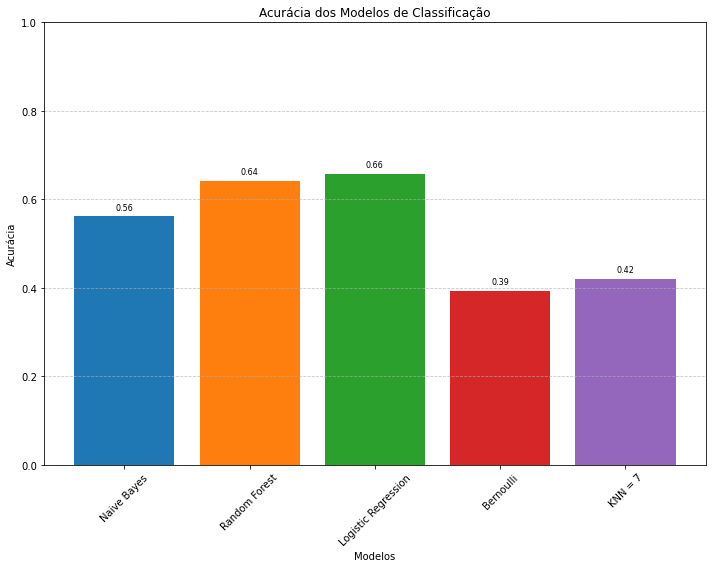

In [11]:
plot_accuracies(accuracies)

In [12]:
def train():
    X_train, X_test, y_train, y_test = train_test_split(df['text'], df['class'], test_size=0.33, random_state=None)
    vectorizer = CountVectorizer()
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)
    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_train_vec, y_train)
    y_pred = clf.predict(X_test_vec)
    accuracy = accuracy_score(y_test, y_pred)
    print("Acurácia do modelo:", accuracy)
    return clf, vectorizer, accuracy

In [13]:
cfl,vec,accu = train()

Acurácia do modelo: 0.6609756097560976


In [14]:
import sklearn.externals as extjoblib
import joblib

In [15]:
joblib.dump(cfl,"model.pkl")

['model.pkl']